<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/GRU_Model_PyTorch_Dengan_ReviewTokoBaju_csv_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 GRU Model PyTorch Dengan ReviewTokoBaju.csv Dataset**

# Install Library

In [1]:
pip install torch pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Import Library

In [2]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


# Load Dataset ReviewTokoBaju.csv

In [6]:
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

display(data)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Pre Processing

In [13]:
data = data.dropna(subset=['Review Text', 'Recommended IND'])  # Menghapus baris dengan Review Text atau Recommended IND yang kosong
data['Review Text'] = data['Review Text'].apply(lambda x: x.lower())  # Mengubah teks menjadi lowercase


In [11]:
# Menyiapkan fitur (X) dan target (y)
X = data['Review Text']
y = data['Recommended IND']


In [14]:
vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi hanya 5000 fitur teratas
X_tfidf = vectorizer.fit_transform(X).toarray()


In [15]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [16]:
# Mengubah data menjadi tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Menambahkan dimensi sequence_length = 1
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)   # Menambahkan dimensi sequence_length = 1
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Bangun GRU Model

In [17]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # GRU layer
        gru_out, _ = self.gru(x)
        # Hanya ambil output terakhir dari GRU
        last_hidden_state = gru_out[:, -1, :]
        output = self.fc(last_hidden_state)
        return output


In [23]:
# Definisikan model, loss, dan optimizer
input_dim = X_train_tensor.shape[2]  # Jumlah fitur (5000)
hidden_dim = 64  # Dimensi hidden state
output_dim = 2  # Dua kelas: direkomendasikan (1) atau tidak (0)
model = GRUModel(input_dim, hidden_dim, output_dim)


In [24]:
# Loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# Latih Model

In [25]:
num_epochs = 10  # Jumlah epoch
train_losses = []
train_accuracies = []


In [27]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Hitung akurasi
    _, predicted = torch.max(output, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)

    # Simpan nilai untuk visualisasi
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    # Print informasi untuk setiap epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")


Epoch [1/10], Loss: 0.5859, Accuracy: 0.8184
Epoch [2/10], Loss: 0.5793, Accuracy: 0.8184
Epoch [3/10], Loss: 0.5727, Accuracy: 0.8184
Epoch [4/10], Loss: 0.5662, Accuracy: 0.8184
Epoch [5/10], Loss: 0.5598, Accuracy: 0.8184
Epoch [6/10], Loss: 0.5534, Accuracy: 0.8184
Epoch [7/10], Loss: 0.5471, Accuracy: 0.8184
Epoch [8/10], Loss: 0.5409, Accuracy: 0.8184
Epoch [9/10], Loss: 0.5348, Accuracy: 0.8184
Epoch [10/10], Loss: 0.5288, Accuracy: 0.8184


# Evaluasi Model

In [33]:
model.eval()
with torch.no_grad():
    output_test = model(X_test_tensor)
    _, predicted_test = torch.max(output_test, 1)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, predicted_test)
    precision = precision_score(y_test, predicted_test)
    recall = recall_score(y_test, predicted_test)
    f1 = f1_score(y_test, predicted_test)
    auc = roc_auc_score(y_test, predicted_test)
    fpr, tpr, _ = roc_curve(y_test, predicted_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, predicted_test)


In [34]:
    # Menampilkan hasil evaluasi
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")


Accuracy: 0.8207
Precision: 0.8207
Recall: 1.0000
F1 Score: 0.9015
AUC: 0.5000


# Visualisasi

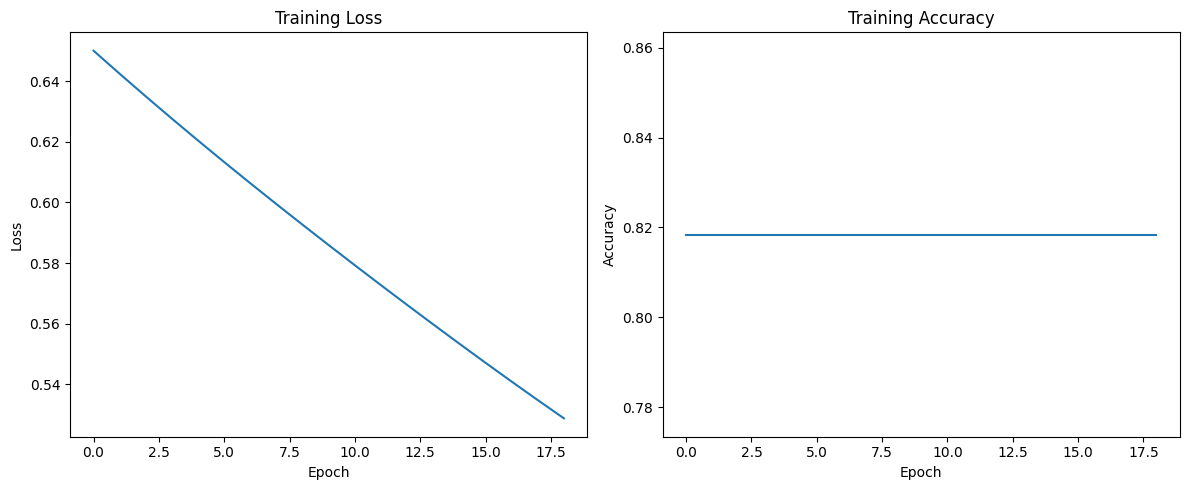

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


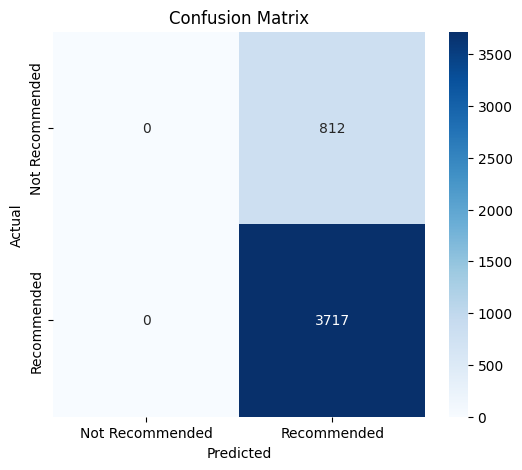

In [36]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


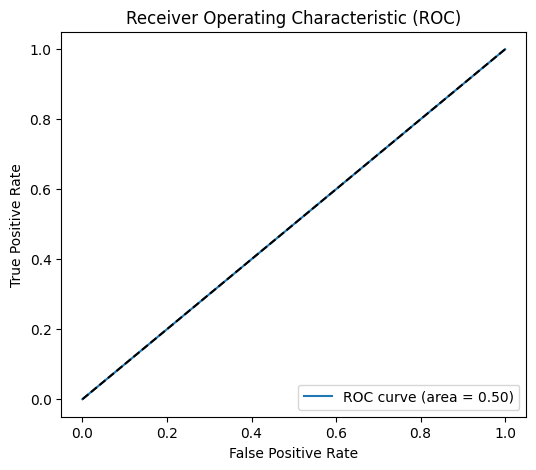

In [37]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
